In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np

In [2]:
# Loading the dataset
df = pd.read_csv('ipl.csv')

## **Exploring the dataset**

In [3]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [4]:
df.shape

(76014, 15)

In [5]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [6]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


## **Data Cleaning**
Points covered under this section:<br/>
*• Removing unwanted columns*<br/>
*• Keeping only consistent teams*<br/>
*• Removing the first 5 overs data in every match*<br/>
*• Converting the column 'date' from string into datetime object*<br/>

In [7]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [8]:
# Removing unwanted columns
columns_to_remove = ['mid', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 10)


In [9]:
df.columns

Index(['date', 'venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [10]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [11]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [12]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [13]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [14]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 10)
After removing inconsistent teams: (53811, 10)


In [15]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [16]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 10)
After removing first 5 overs data: (40108, 10)


In [17]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


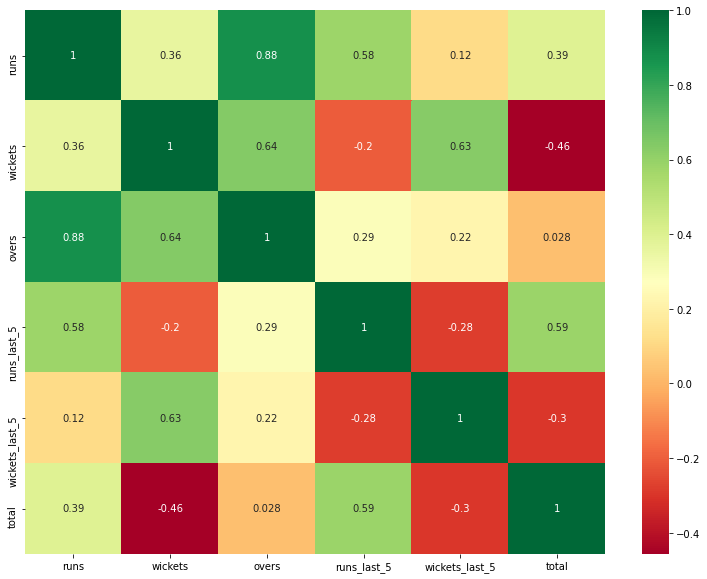

In [18]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [19]:
df['venue'].value_counts().head(10)

Eden Gardens                                  4497
M Chinnaswamy Stadium                         4406
Feroz Shah Kotla                              4265
Wankhede Stadium                              4259
MA Chidambaram Stadium, Chepauk               3734
Punjab Cricket Association Stadium, Mohali    2710
Sawai Mansingh Stadium                        2516
Rajiv Gandhi International Stadium, Uppal     2221
Sardar Patel Stadium, Motera                  1016
Kingsmead                                     1012
Name: venue, dtype: int64

In [20]:
sorted_venues = df.groupby(['venue'])['venue'].count().sort_values(ascending=False)

In [21]:
main= df.copy()

In [22]:
def venue_selection(x):
    x = str(x)
    if sorted_venues[x] > 1000:
        return x
    else:
        return 'other'

In [23]:
df['venue'] = df['venue'].apply(lambda x: venue_selection(x))

In [24]:
df['venue'].nunique()

11

## **Data Preprocessing**
*• Handling categorical features*<br/>
*• Splitting dataset into train and test set on the basis of date*<br/>

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['venue'] = le.fit_transform(df['venue'])
integer_mapping = {l: i for i, l in enumerate(le.classes_)}

In [26]:
integer_mapping

{'Eden Gardens': 0,
 'Feroz Shah Kotla': 1,
 'Kingsmead': 2,
 'M Chinnaswamy Stadium': 3,
 'MA Chidambaram Stadium, Chepauk': 4,
 'Punjab Cricket Association Stadium, Mohali': 5,
 'Rajiv Gandhi International Stadium, Uppal': 6,
 'Sardar Patel Stadium, Motera': 7,
 'Sawai Mansingh Stadium': 8,
 'Wankhede Stadium': 9,
 'other': 10}

In [27]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['date', 'venue', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [28]:
encoded_df.head()

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,3,61,0,5.1,59,0,222,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,3,61,1,5.2,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,3,61,1,5.3,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,3,61,1,5.4,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,3,61,1,5.5,58,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'venue', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [30]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 22) and Test set: (2778, 22)


## **Model Building**
I will experiment with 5 different algorithms, they are as follows:<br/>
*• Linear Regression*<br/>
*• Decision Tree Regression*<br/>
*• Random Forest Regression*<br/>

----- Boosting Algorithm -----<br/>
*• Adaptive Boosting (AdaBoost) Algorithm*<br/>

### *Linear Regression*

In [31]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
# Predicting results
y_pred_lr = linear_regressor.predict(X_test)

In [33]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.12294651297823
Mean Squared Error (MSE): 250.95375118467047
Root Mean Squared Error (RMSE): 15.841519850843557


### *Decision Tree*

In [34]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
# Predicting results
y_pred_dt = decision_regressor.predict(X_test)

In [36]:
# Decision Tree Regression - Model Evaluation
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 17.58027357811375
Mean Squared Error (MSE): 562.8977681785457
Root Mean Squared Error (RMSE): 23.725466658815073


### *Random Forest*

In [37]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [39]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 14.529841612670984
Mean Squared Error (MSE): 368.8130111591073
Root Mean Squared Error (RMSE): 19.20450497042575


*Note: Since Linear Regression model performs best as compared to other two, we use this model and boost it's performance using AdaBoost Algorithm*

### *AdaBoost Algorithm*

In [40]:
# AdaBoost Model using Linear Regression as the base learner
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(base_estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         learning_rate=1.0, loss='linear', n_estimators=100,
         random_state=None)

In [41]:
# Predicting results
y_pred_adb = adb_regressor.predict(X_test)

In [42]:
# AdaBoost Regression - Model Evaluation
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.137257073198153
Mean Squared Error (MSE): 247.8579693077675
Root Mean Squared Error (RMSE): 15.74350562320119


*Note: Using AdaBoost did not reduce the error to a significant level. Hence, we will you simple linear regression model for prediction*

## **Predictions**
• Model *trained on* the data from **IPL Seasons 1 to 9** ie: (2008 to 2016)<br/>
• Model *tested on* data from **IPL Season 10** ie: (2017)<br/>
• Model *predicts on* data from **IPL Seasons 11 to 12** ie: (2018 to 2019)

In [43]:
def predict_score(venue='Eden Gardens', batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
    
    
    temp_array = list()
    if venue == 'Eden Gardens':
        temp_array = temp_array + [0]
    elif venue == 'Feroz Shah Kotla':
        temp_array = temp_array + [1]
    elif venue == 'Kingsmead':
        temp_array = temp_array + [2]
    elif venue == 'M Chinnaswamy Stadium':
        temp_array = temp_array + [3]
    elif venue == 'MA Chidambaram Stadium, Chepauk':
        temp_array = temp_array + [4]
    elif venue == 'Punjab Cricket Association Stadium':
        temp_array = temp_array + [5]
    elif venue == 'Rajiv Gandhi International Stadium':
        temp_array = temp_array + [6]
    elif venue == 'Sardar Patel Stadium':
        temp_array = temp_array + [7]
    elif venue == 'Sawai Mansingh Stadium':
        temp_array = temp_array + [8]
    elif venue == 'Wankhede Stadium':
        temp_array = temp_array + [9]
    elif venue == 'other':
        temp_array = temp_array + [10]

    # Batting Team
    if batting_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif batting_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif batting_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif batting_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif batting_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif batting_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif batting_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif batting_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]

    # Bowling Team
    if bowling_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif bowling_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif bowling_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif bowling_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif bowling_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif bowling_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif bowling_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif bowling_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]

    # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
    temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

    # Converting into numpy array
    temp_array = np.array([temp_array])
    print(temp_array)

    # Prediction
    return int(linear_regressor.predict(temp_array)[0])

### **Prediction 1**
• Date: 16th April 2018<br/>
• IPL : Season 11<br/>
• Match number: 13<br/>
• Teams: Kolkata Knight Riders vs. Delhi Daredevils<br/>
• First Innings final score: 200/9


In [44]:
final_score = predict_score(venue='Eden Gardens' , batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=9.2, runs=79, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

[[ 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   9.2 79.   2.  60.   1. ]]
The final predicted score (range): 159 to 174


### **Prediction 2**
• Date: 7th May 2018<br/>
• IPL : Season 11<br/>
• Match number: 39<br/>
• Teams: Sunrisers Hyderabad vs. Royal Challengers Bangalore<br/>
• First Innings final score: 146/10


In [45]:
final_score = predict_score(venue='M Chinnaswamy Stadium', batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

[[ 3.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   1.   0.  10.5 67.   3.  29.   1. ]]
The final predicted score (range): 138 to 153


### **Prediction 3**
• Date: 17th May 2018<br/>
• IPL : Season 11<br/>
• Match number: 50<br/>
• Teams: Mumbai Indians vs. Kings XI Punjab<br/>
• First Innings final score: 186/8<br/>


In [46]:
final_score = predict_score(venue='Wankhede Stadium',batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

[[  9.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    1.
    0.    0.    0.    0.    0.   14.1 136.    4.   50.    0. ]]
The final predicted score (range): 180 to 195


### **Prediction 4**
• Date: 30th March 2019<br/>
• IPL : Season 12<br/>
• Match number: 9<br/>
• Teams: Mumbai Indians vs. Kings XI Punjab<br/>
• First Innings final score: 176/7


In [47]:
final_score = predict_score(venue='Wankhede Stadium' ,batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=12.3, runs=113, wickets=2, runs_in_prev_5=55, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

[[  9.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    1.
    0.    0.    0.    0.    0.   12.3 113.    2.   55.    0. ]]
The final predicted score (range): 179 to 194


### **Prediction 5**
• Date: 11th April 2019<br/>
• IPL : Season 12<br/>
• Match number: 25<br/>
• Teams: Rajasthan Royals vs. Chennai Super Kings<br/>
• First Innings final score: 151/7


In [48]:
final_score = predict_score(venue='MA Chidambaram Stadium, Chepauk', batting_team='Rajasthan Royals', bowling_team='Chennai Super Kings', overs=13.3, runs=92, wickets=5, runs_in_prev_5=27, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

[[ 4.   0.   0.   0.   0.   0.   1.   0.   0.   1.   0.   0.   0.   0.
   0.   0.   0.  13.3 92.   5.  27.   2. ]]
The final predicted score (range): 128 to 143


### **Prediction 6**
• Date: 14th April 2019<br/>
• IPL : Season 12<br/>
• Match number: 30<br/>
• Teams: Sunrisers Hyderabad vs. Delhi Daredevils<br/>
• First Innings final score: 155/7


In [49]:
final_score = predict_score(venue='Feroz Shah Kotla' , batting_team='Delhi Daredevils', bowling_team='Sunrisers Hyderabad', overs=11.5, runs=98, wickets=3, runs_in_prev_5=41, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

[[ 1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   1.  11.5 98.   3.  41.   1. ]]
The final predicted score (range): 157 to 172


### **Prediction 7**
• Date: 10th May 2019<br/>
• IPL : Season 12<br/>
• Match number: 59 (Eliminator)<br/>
• Teams: Delhi Daredevils vs. Chennai Super Kings<br/>
• First Innings final score: 147/9


In [50]:
final_score = predict_score(venue='Feroz Shah Kotla' , batting_team='Delhi Daredevils', bowling_team='Chennai Super Kings', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

[[ 1.   0.   1.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.
   0.   0.   0.  10.2 68.   3.  29.   1. ]]
The final predicted score (range): 137 to 152


*Note: In IPL, it is very difficult to predict the actual score because in a moment of time the game can completely turn upside down!*
